1. Implement the midpoint ellipse algorithm.

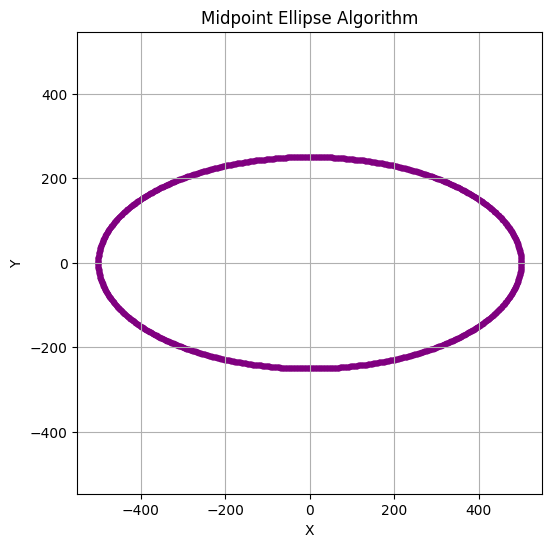

In [4]:
import matplotlib.pyplot as plt

def plot_ellipse_points(xc, yc, x, y, xes, yes):
    pts = [
        (x + xc, y + yc),
        (-x + xc, y + yc),
        (x + xc, -y + yc),
        (-x + xc, -y + yc),
    ]
    for px, py in pts:
        xes.append(px)
        yes.append(py)

def midpoint_ellipse(rx, ry, xc=0, yc=0):
    rx2 = rx * rx
    ry2 = ry * ry
    x = 0
    y = ry
    xes, yes = [], []

    # Region 1
    p1 = ry2 - (rx2 * ry) + 0.25 * rx2
    plot_ellipse_points(xc, yc, x, y, xes, yes)
    while 2 * ry2 * x <= 2 * rx2 * y:
        x += 1
        if p1 < 0:
            p1 += 2 * ry2 * x + ry2
        else:
            y -= 1
            p1 += 2 * ry2 * x - 2 * rx2 * y + ry2
        plot_ellipse_points(xc, yc, x, y, xes, yes)

    # Region 2
    p2 = (ry2 * (x + 0.5) ** 2) + (rx2 * (y - 1) ** 2) - (rx2 * ry2)
    while y >= 0:
        if p2 > 0:
            y -= 1
            p2 -= 2 * rx2 * y + rx2
        else:
            x += 1
            y -= 1
            p2 += 2 * ry2 * x - 2 * rx2 * y + rx2
        plot_ellipse_points(xc, yc, x, y, xes, yes)

    return xes, yes

def plot_midpoint_ellipse(rx, ry, xc=0, yc=0):
    xes, yes = midpoint_ellipse(rx, ry, xc, yc)
    plt.figure(figsize=(6, 6))
    plt.scatter(xes, yes, marker='.', color='purple')
    plt.title("Midpoint Ellipse Algorithm")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid(True)
    plt.axis('equal')
    plt.show()

# Example
plot_midpoint_ellipse(500, 250, 0, 0)

2. Draw ellipses with different radii and centres.

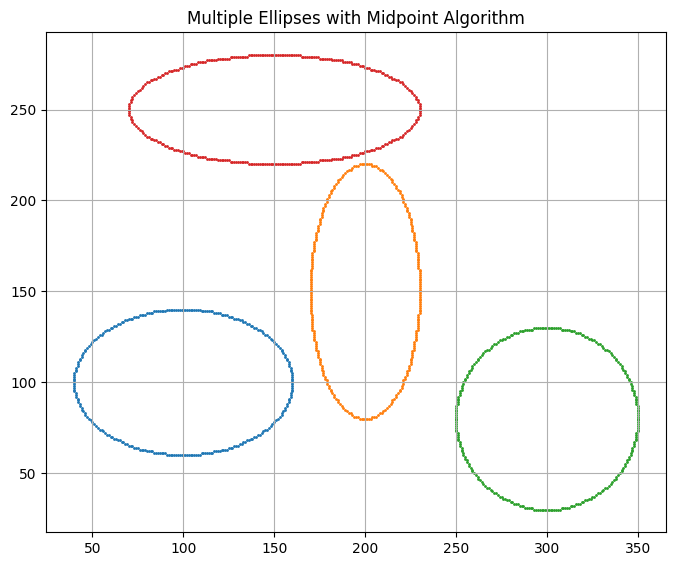

In [5]:
import matplotlib.pyplot as plt

def midpoint_ellipse(rx, ry, xc, yc):
    x = 0
    y = ry

    rx2 = rx * rx
    ry2 = ry * ry
    tworx2 = 2 * rx2
    twory2 = 2 * ry2

    p1 = ry2 - (rx2 * ry) + (0.25 * rx2)
    dx = 0
    dy = tworx2 * y

    points = []

    while dx < dy:
        points.extend([
            (xc + x, yc + y), (xc - x, yc + y),
            (xc + x, yc - y), (xc - x, yc - y)
        ])
        x += 1
        dx += twory2
        if p1 < 0:
            p1 += ry2 + dx
        else:
            y -= 1
            dy -= tworx2
            p1 += ry2 + dx - dy

    p2 = ry2 * (x + 0.5)**2 + rx2 * (y - 1)**2 - rx2 * ry2
    while y >= 0:
        points.extend([
            (xc + x, yc + y), (xc - x, yc + y),
            (xc + x, yc - y), (xc - x, yc - y)
        ])
        y -= 1
        dy -= tworx2
        if p2 > 0:
            p2 += rx2 - dy
        else:
            x += 1
            dx += twory2
            p2 += rx2 - dy + dx

    return points

# Define multiple ellipses with different radii and centers
ellipses = [
    (60, 40, 100, 100),
    (30, 70, 200, 150),
    (50, 50, 300, 80),
    (80, 30, 150, 250)
]

# Plotting
plt.figure(figsize=(8, 8))
for rx, ry, xc, yc in ellipses:
    points = midpoint_ellipse(rx, ry, xc, yc)
    x_vals, y_vals = zip(*points)
    plt.scatter(x_vals, y_vals, s=1)

plt.gca().set_aspect('equal')
plt.title("Multiple Ellipses with Midpoint Algorithm")
plt.grid(True)
plt.show()

3. Compare the point spacing in Region 1 and Region 2.

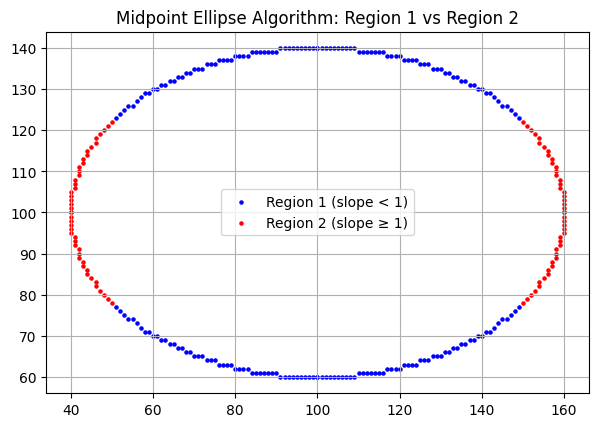

In [6]:
import matplotlib.pyplot as plt

def midpoint_ellipse(rx, ry, xc, yc):
    x = 0
    y = ry

    rx2 = rx * rx
    ry2 = ry * ry
    tworx2 = 2 * rx2
    twory2 = 2 * ry2

    # Region 1
    p1 = ry2 - (rx2 * ry) + (0.25 * rx2)
    dx = 0
    dy = tworx2 * y

    region1_points = []
    region2_points = []

    while dx < dy:  # Region 1
        region1_points.extend([
            (xc + x, yc + y), (xc - x, yc + y),
            (xc + x, yc - y), (xc - x, yc - y)
        ])
        x += 1
        dx += twory2
        if p1 < 0:
            p1 += ry2 + dx
        else:
            y -= 1
            dy -= tworx2
            p1 += ry2 + dx - dy

    # Region 2
    p2 = ry2 * (x + 0.5)**2 + rx2 * (y - 1)**2 - rx2 * ry2
    while y >= 0:
        region2_points.extend([
            (xc + x, yc + y), (xc - x, yc + y),
            (xc + x, yc - y), (xc - x, yc - y)
        ])
        y -= 1
        dy -= tworx2
        if p2 > 0:
            p2 += rx2 - dy
        else:
            x += 1
            dx += twory2
            p2 += rx2 - dy + dx

    return region1_points, region2_points

# Example ellipse
rx, ry, xc, yc = 60, 40, 100, 100
region1, region2 = midpoint_ellipse(rx, ry, xc, yc)

# Plotting
plt.figure(figsize=(7,7))
if region1:
    x1, y1 = zip(*region1)
    plt.scatter(x1, y1, s=5, color='blue', label='Region 1 (slope < 1)')
if region2:
    x2, y2 = zip(*region2)
    plt.scatter(x2, y2, s=5, color='red', label='Region 2 (slope ≥ 1)')

plt.gca().set_aspect('equal')
plt.title("Midpoint Ellipse Algorithm: Region 1 vs Region 2")
plt.legend()
plt.grid(True)
plt.show()